# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nova vicosa
Processing Record 2 of Set 1 | belmonte
Processing Record 3 of Set 1 | withernsea
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | korsholm
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | jiuquan
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | willowmore
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | esquel
Processing Record 14 of Set 1 | pelabuhanratu
Processing Record 15 of Set 1 | conde
Processing Record 16 of Set 1 | usinsk
Processing Record 17 of Set 1 | port mathurin
Processing Record 18 of Set 1 | chopinzinho
Processing Record 19 of Set 1 | el obeid
Processing Record 20 of Set 1 | musanze
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | iqaluit
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | mega
Processing Record 43 of Set 4 | mae sot
Processing Record 44 of Set 4 | san antonio de pale
Processing Record 45 of Set 4 | codrington
Processing Record 46 of Set 4 | hermanus
Processing Record 47 of Set 4 | osceola
Processing Record 48 of Set 4 | gambela
Processing Record 49 of Set 4 | mahajanga
Processing Record 0 of Set 5 | tari
Processing Record 1 of Set 5 | khadan khak
Processing Record 2 of Set 5 | puttalam
Processing Record 3 of Set 5 | vernon
Processing Record 4 of Set 5 | korla
Processing Record 5 of Set 5 | tidjikja
Processing Record 6 of Set 5 | ust-nera
Processing Record 7 of Set 5 | masterton
Processing Record 8 of Set 5 | la'ie
Processing Record 9 of Set 5 | west island
Processing Record 10 of Set 5 | petropavlovsk-kamchatsky
Processing Record 11 of Set 5 | muisne
Processing Record 12 of Set 5 | micheweni
Processing Record 13 of Set 5 | sinabang
Processing Record 14 of Set 5 | enewetak
Processing 

Processing Record 34 of Set 8 | prince rupert
Processing Record 35 of Set 8 | howard springs
Processing Record 36 of Set 8 | namtsy
Processing Record 37 of Set 8 | huicheng
Processing Record 38 of Set 8 | greater sudbury
Processing Record 39 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 8 | shillong
Processing Record 41 of Set 8 | chagoda
Processing Record 42 of Set 8 | dudinka
Processing Record 43 of Set 8 | ghadamis
Processing Record 44 of Set 8 | smederevo
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | troitskaya
Processing Record 47 of Set 8 | madagali
Processing Record 48 of Set 8 | buulobarde
Processing Record 49 of Set 8 | rurrenabaque
Processing Record 0 of Set 9 | gebeit
Processing Record 1 of Set 9 | matoury
Processing Record 2 of Set 9 | egilsstadir
Processing Record 3 of Set 9 | ivdel'
Processing Record 4 of Set 9 | santa ana
Processing Record 5 of Set 9 | beyneu
Processing Record 6 of Set 9 | cesky krumlov
Processi

Processing Record 23 of Set 12 | hell-ville
Processing Record 24 of Set 12 | kutum
Processing Record 25 of Set 12 | zag
Processing Record 26 of Set 12 | kourou
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | kiruna
Processing Record 29 of Set 12 | ruteng
Processing Record 30 of Set 12 | kailua-kona
Processing Record 31 of Set 12 | tahoua
Processing Record 32 of Set 12 | orumiyeh
Processing Record 33 of Set 12 | jaciara
Processing Record 34 of Set 12 | zhangjiakou
Processing Record 35 of Set 12 | nalut
Processing Record 36 of Set 12 | penal
Processing Record 37 of Set 12 | madang
Processing Record 38 of Set 12 | severo-yeniseyskiy
Processing Record 39 of Set 12 | jangaon
Processing Record 40 of Set 12 | port arthur
Processing Record 41 of Set 12 | portland
Processing Record 42 of Set 12 | murun-kuren
Processing Record 43 of Set 12 | moose jaw
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nova vicosa,-17.8919,-39.3719,70.97,87,34,7.05,BR,1689547744
1,belmonte,-15.8631,-38.8828,72.84,88,36,5.23,BR,1689547744
2,withernsea,53.7311,0.0335,58.08,87,64,15.30,GB,1689547744
3,waitangi,-43.9535,-176.5597,49.82,95,96,5.01,NZ,1689547745
4,port-aux-francais,-49.3500,70.2167,35.33,53,78,19.04,TF,1689547745


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova vicosa,-17.8919,-39.3719,70.97,87,34,7.05,BR,1689547744
1,belmonte,-15.8631,-38.8828,72.84,88,36,5.23,BR,1689547744
2,withernsea,53.7311,0.0335,58.08,87,64,15.30,GB,1689547744
3,waitangi,-43.9535,-176.5597,49.82,95,96,5.01,NZ,1689547745
4,port-aux-francais,-49.3500,70.2167,35.33,53,78,19.04,TF,1689547745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

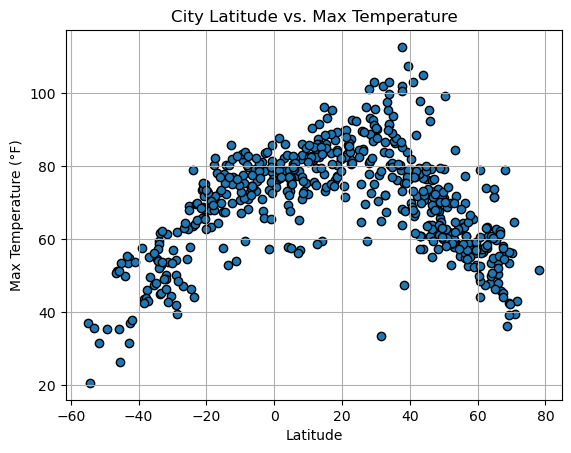

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

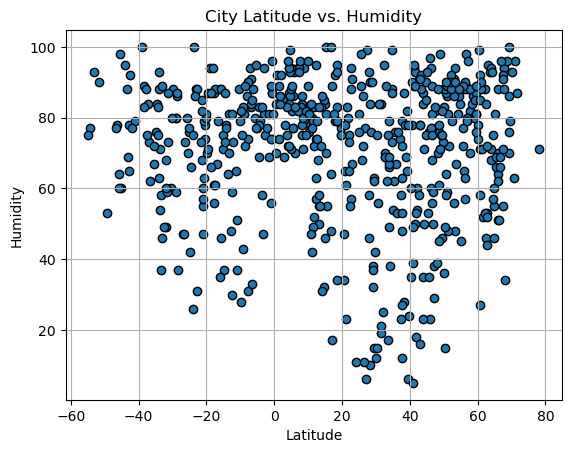

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

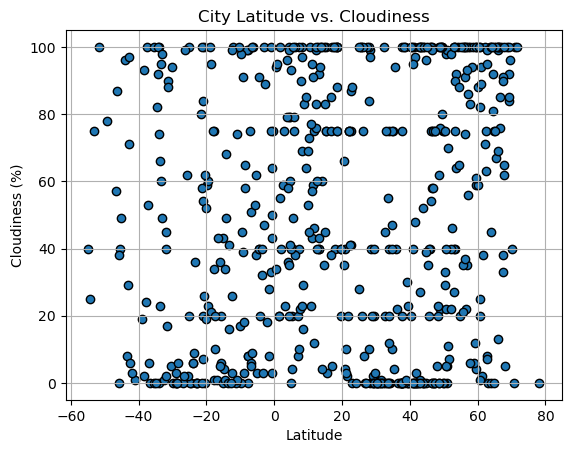

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

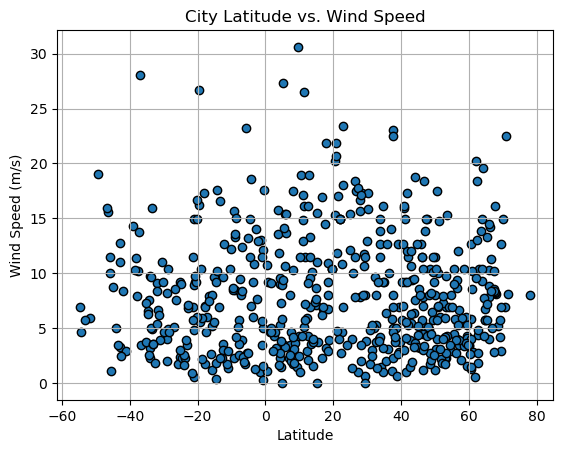

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

    # Get regression values
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
    # Label plot and annotate the line equation
    plt.title(f'{x_label} vs. {y_label} Linear Regression')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(20,5),fontsize=15,color="red")
    plt.show()


    

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]>=0)])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,withernsea,53.7311,0.0335,58.08,87,64,15.30,GB,1689547744
6,korsholm,63.1142,21.6822,60.89,95,0,10.36,FI,1689547615
7,st. john's,47.5649,-52.7093,73.27,82,75,14.97,CA,1689547564
8,jiuquan,39.7432,98.5174,76.60,24,0,3.74,CN,1689547746
9,vadso,70.0744,29.7487,56.28,93,40,14.97,NO,1689547746


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df["Lat"]<=0)])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nova vicosa,-17.8919,-39.3719,70.97,87,34,7.05,BR,1689547744
1,belmonte,-15.8631,-38.8828,72.84,88,36,5.23,BR,1689547744
3,waitangi,-43.9535,-176.5597,49.82,95,96,5.01,NZ,1689547745
4,port-aux-francais,-49.3500,70.2167,35.33,53,78,19.04,TF,1689547745
5,adamstown,-25.0660,-130.1015,69.15,76,100,2.33,PN,1689547745


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


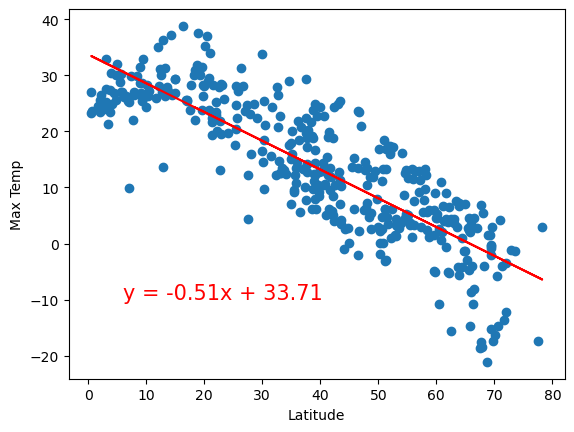

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


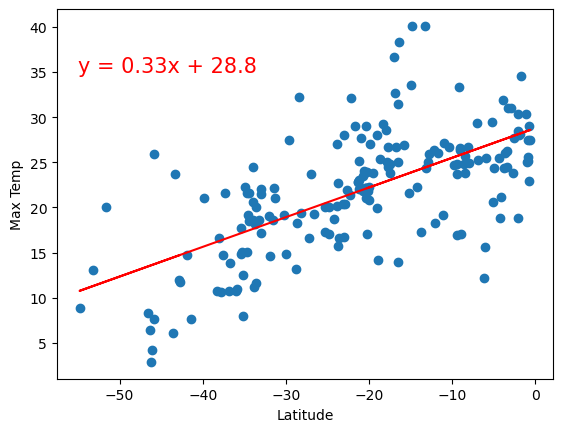

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


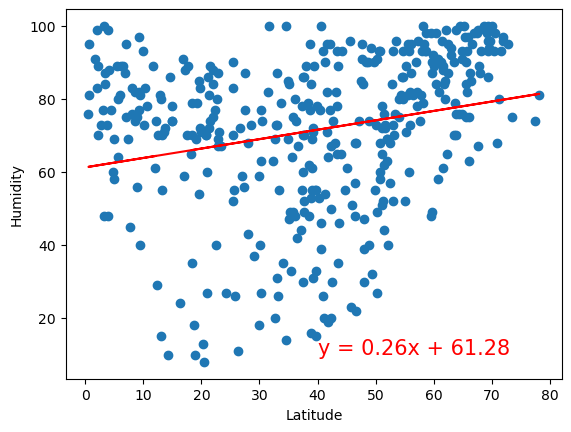

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


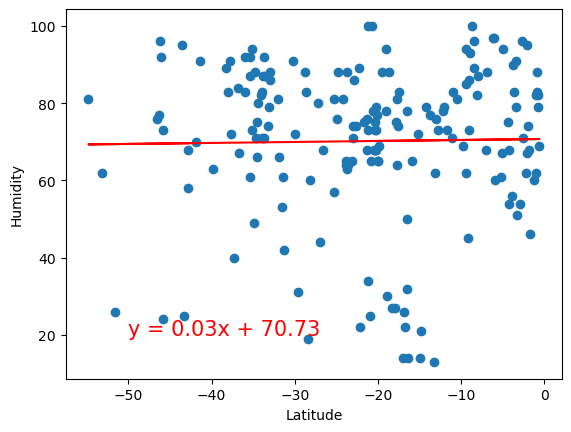

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


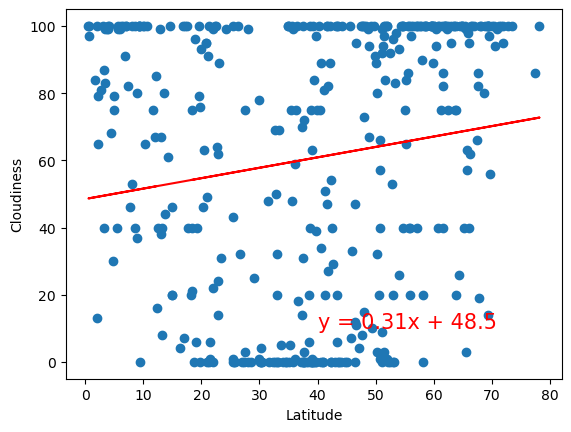

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


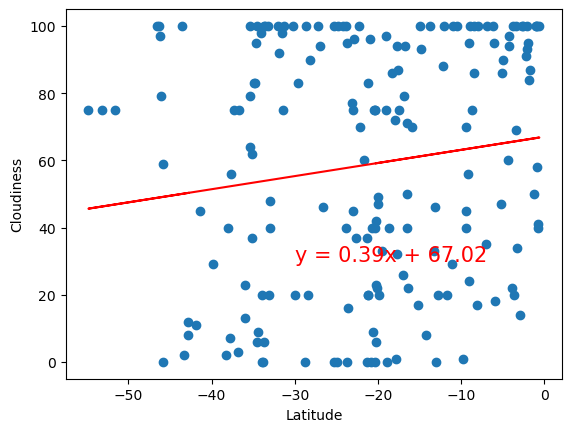

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


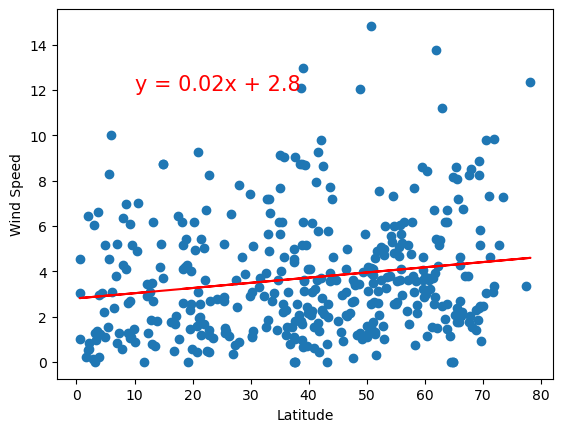

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


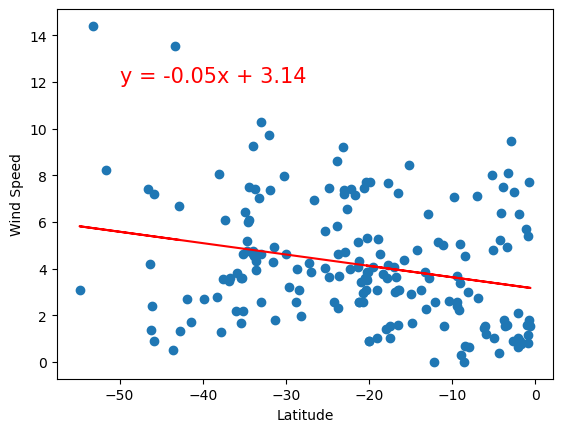

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE